#**1. 결정트리**
- sklearn 패키지의 breast_cancer 데이터셋 이용

##**1) 데이터를 로딩하고, 훈련세트와 테스트 세트로 나누기(훈련 세트 : 80%)**

In [ ]:
## 데이터 준비
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 데이터를 훈련 세트와 테스트 세트로 나누기 (80:20 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**2) 결정 트리 모델을 생성 및 학습하기**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 모델 생성 및 학습
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

♦️ 지표 설명 (총 30가지의 속성)
- worst smooothness <=0.178 과 같은 피처 조건은 자식 노드를 위한 규칙 조건 > 없으면 리프 노드
- gini : 데이터 분포에서 지니계수
- samples : 현 규칙에 해당하는 데이터 건수
- value = [] : 클래스 값 기반의 데이터 건수
      - 유방암 데이터 세트의 클래스 값 : 0,1
          malignant(0, 악성), benign(1, 양성)

##**3) 테스트 데이터로 예측 정확도를 구하기**

In [ ]:
from sklearn.metrics import accuracy_score
# 테스트 세트에 대한 예측 수행
pred = dt_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.9474


##**4) 오차행렬 출력하기**

In [ ]:
from sklearn.metrics import  confusion_matrix

# 오차 행렬 출력
conma = confusion_matrix(y_test, pred)
print("오차 행렬:\n", conma)

오차 행렬:
 [[40  3]
 [ 3 68]]


##**5) 각 피처별 중요도 값 매핑하여 막대그래프로**
# 파라미터 조합
    params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }
# GridSearchCV 객체 생성 (교차 검증은 기본적으로 5-폴드 사용)
grid_cv = GridSearchCV(dt_clf, param_grid=params, cv=5, verbose = 1, scoring='accuracy')

# 훈련 데이터를 사용하여 GridSearchCV 수행
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

##**6) 최적의 하이퍼 파라미터 점수와 평균 정확도 수치 출력**
## 예시 : GridSearchCV 최고 평균 정확도 수치 :
##       GridSearchCV 최적 하이퍼 파라미터 : {'criterion': ~, 'max_depth': ~,'min_samples_leaf':~, 'min_samples_split': ~}

In [ ]:
print("최적의 하이퍼파라미터:", grid_cv.best_params_)
print("최고의 교차 검증 점수:{0:.4f}".format(grid_cv.best_score_))

최적의 하이퍼파라미터: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
최고의 교차 검증 점수:0.9473


##**7) 최적화된 모델로 테스트 데이터 예측 수행**
- 최적 하이퍼 파라미터로 학습은 어떻게? : best_estimator_ 속성 활용

In [ ]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.9561


##**8) 특성 중요도 시각화**
- top 6 피처를 막대그래프로 표현하기
- 각 피처의 중요도 : feature_importances_ 속성으로
- numpy로 피처 이름과 중요도 정렬하기

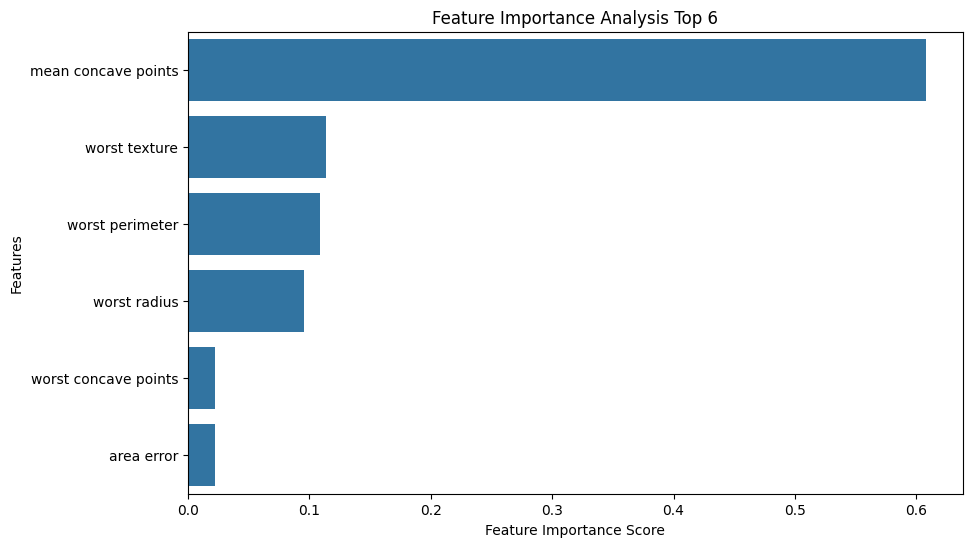

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 최적의 모델에서 피처 중요도 추출
feature_importances_values = best_dt_clf.feature_importances_
features = np.array(cancer.feature_names)

# 중요도 순으로 내림차순 정렬
ranking = np.argsort(feature_importances_values)[::-1]
# 상위 6개의 피처 선택
top6_ranking = ranking[:6]

# 상위 6개 피처와 중요도 값을 추출
top6_features = features[top6_ranking]
top6_importances = feature_importances_values[top6_ranking]

# 상위 6개 피처 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top6_importances, y=top6_features)
plt.title('Feature Importance Analysis Top 6')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

#**2. 앙상블**

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

##**1) digits 데이터 셋을 load_digits() 함수를 사용해서 불러온 후, 훈련 세트와 테스트 세트로 나눠 주세요.**

- test_size = 0.2
- random_state = 42

In [ ]:
# 데이터셋 로드 및 훈련/테스트 세트 분리
digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

##**2)로지스틱 회귀, KNN, 결정 트리를 개별 모델로 사용하여 개별 모델의 학습/예측/평가를 진행해 주세요.**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

- 로지스틱 회귀: max_iter = 10000, solver = 'lbfgs'
- KNN: n_neighbors = 16
- 결정 트리: random_state = 12

In [ ]:
# 개별 모델 선언
lr_clf = LogisticRegression(max_iter=10000,solver='lbfgs')
knn_clf = KNeighborsClassifier(n_neighbors=16)
dt_clf = DecisionTreeClassifier(random_state=12)

# 각 모델에 대해 학습 및 평가 수행
classifiers =[lr_clf, knn_clf, dt_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print("{0} 정확도: {1:.4f}".format(class_name, accuracy_score(y_test,pred)))


LogisticRegression 정확도: 0.9750
KNeighborsClassifier 정확도: 0.9806
DecisionTreeClassifier 정확도: 0.8639


##**3)앞서 만든 모델 3개를 기반으로 하여 '하드 보팅' 방식으로 보팅 분류기를 생성한 후, 학습/예측/평가를 진행해 주세요.**

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# 하드 보팅 분류기 생성
hard_clf = VotingClassifier(estimators=[('lr', lr_clf), ('knn',knn_clf),('dt', dt_clf)], voting='hard')
hard_clf.fit(X_train, y_train)
hard_pred = hard_clf.predict(X_test)
print("Hard Voting Accuracy:", accuracy_score(y_test,hard_pred))

Hard Voting Accuracy: 0.975


##**4)앞서 만든 모델 3개를 기반으로 하여 '소프트 보팅' 방식으로 보팅 분류기를 생성한 후, 학습/예측/평가를 진행해 주세요.**

In [ ]:
# 소프트 보팅 분류기 생성
soft_clf = VotingClassifier(estimators=[('lr',lr_clf),('knn', knn_clf),('dt', dt_clf)], voting='soft')
soft_clf.fit(X_train, y_train)
soft_pred = soft_clf.predict(X_test)
print("Soft Voting Accuracy:", accuracy_score(y_test, soft_pred))


Soft Voting Accuracy: 0.9777777777777777


#**3. OOB 평가**

- n_estimators = 100
- 중복 허용 가능
- 가용한 모든 코어 사용
- random_state=42

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Bagging을 사용한 결정 트리 학습 및 OOB 평가
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100,
    bootstrap=True, oob_score=True, n_jobs=-1,
    random_state = 42
)
bag_clf.fit(X_train, y_train)

# OOB 평가 점수 출력
print("OOB Score:", bag_clf.oob_score_)


OOB Score: 0.9436325678496869


#**4. 랜덤 포레스트**

##**1) 사이킷런의 붓꽃데이터세트를 RandomForestClassifier를 이용하여 예측하세요.**



In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터셋을 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 훈련
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'예측 정확도: {accuracy:.2f}')

예측 정확도: 1.00


##**2) 사이킷런의 유방암 데이터셋을 이용하여 GridSearchCV기법으로 최적파라미터를 구하는 코드를 짜주세요.**

- 파라미터 값은 다양하게 나올 수 있음. 그리드 범위 설정에 대한 이해 심화 필요


In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터셋 로드
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 데이터셋을 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성
model = RandomForestClassifier(random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV를 사용하여 최적 파라미터 찾기
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 및 최고 점수 출력
print('최적 하이퍼파라미터:', grid_search.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_search.best_score_))

# 최적 파라미터로 모델 훈련 및 테스트
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 테스트 세트 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'테스트 세트 예측 정확도: {accuracy:.2f}')

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

최적 하이퍼파라미터: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
최고 예측 정확도: 0.9626
테스트 세트 예측 정확도: 0.96
